## Lalama IV: It Gets Easier

Alright.

I showed you all that stuff I just showed because you probably will have to use it one day if you do any kind of coding.

But for most analyses we do, somebody already wrote code that does that analysis.

We can just use the great code that they wrote and that thousands of other people have already tested and improved.

Now we're standing on the shoulder of giants! Or something like that.

## numpy: like matlab in Python

**numpy** is a library that provides matrix-like structures that many scientists use.

It extends **slice notation** so that we can refer to rows and columns of a matrix.

It also implements many functions that Matlab users will be familiar with.

```Python
import numpy as np
zero_arr = np.zeros((10,10)) # creates a 10 by 10 array / matrix of zeros
print(zero_arr[5,5])
>>> 0
```

We can rewrite our mean and standard deviation dictionary functions using numpy functions.
** These functions are much faster, especially when dealing with large datasets, because numpy is a Python wrapper around very efficient scientific computing libraries written in s

In [ ]:
import numpy as np
def compute_mouse_dict_mean_and_std(mouse_dict):
    """
    takes mouse_dict returned by make_mouse_dict
    and computes mean for each strain.
    returns mean_mouse_dict.
    """
    mean_mouse_dict = {}
    stdev_mouse_dict = {}
    
    for key,val in mouse_dict.items():
        mean_mouse_dict[key] = np.mean(val)
        stddev_mouse_dict[key] = np.mean(std)
    return mean_mouse_dict,stdev_mouse_dict

## pandas: it gets even easier

Let's use the **pandas** library to do the heavy lifting of importing csv files.

**pandas** allows us to work with objects called **dataframes** that you may be familiar with if you have ever used the statistical programming language R.

In [78]:
import pandas as pd

filename = 'Willott1_table-1.csv'
df = pd.read_csv(filename,skiprows=6,header=0) # df is short for 'dataframe'

In [79]:
df.head() # head method shows the first few rows

,strain,sex,id,round,bw,PPI_4,PPI_12,PPI_20,PPI_tot,ASR_70,ASR_80,ASR_90,ASR_100,ASR_latency,ASR_habituation
0,129S1/SvImJ,f,F103,all,NaN,0.3745,0.27400,0.24500,0.8925,134.50,254.00,340.5,706.5,31.45,0.446
1,129S1/SvImJ,f,F104,all,NaN,0.9875,0.96600,0.81400,2.7650,158.50,232.00,251.5,223.5,27.70,0.662
2,129S1/SvImJ,f,F105,all,NaN,0.2990,0.14685,0.10895,0.5545,70.85,91.15,379.0,721.5,35.20,1.101
3,129S1/SvImJ,f,F106,all,NaN,0.5720,0.43000,0.37200,1.3755,197.50,188.50,400.5,498.0,28.45,0.526
4,129S1/SvImJ,f,F107,all,NaN,0.9565,0.61100,0.53450,2.1050,79.85,150.00,240.0,237.5,27.70,0.571


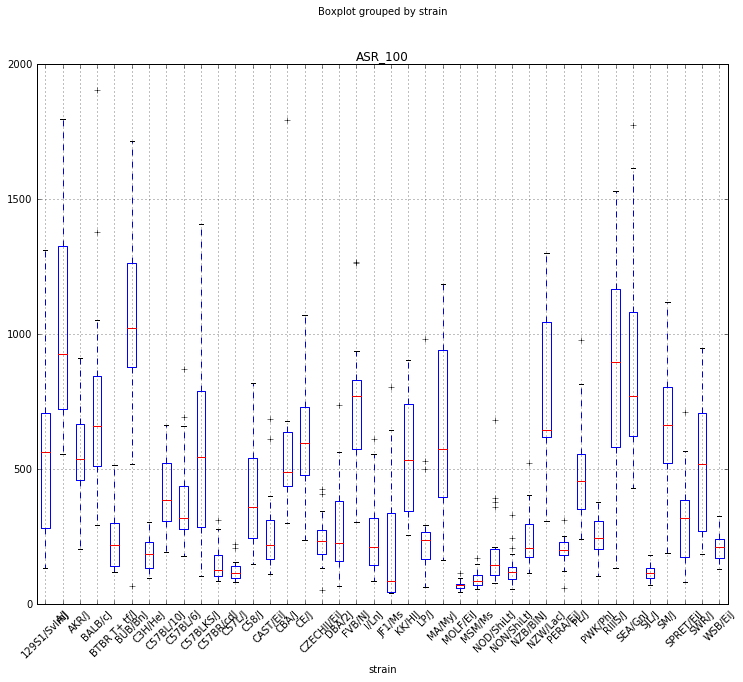

In [74]:
%matplotlib inline
df.boxplot(column='ASR_100',by='strain',rot=45,figsize=(12,10))

In [83]:
def boxplot_sorted(df, by, column, figsize, rot=0):
    """
    borrowed from http://deparkes.co.uk/2016/11/04/sort-pandas-boxplot/
    """
    # use dict comprehension to create new dataframe from the iterable groupby object
    # each group name becomes a column in the new dataframe
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    # find and sort the median values in this new dataframe
    meds = df2.median().sort_values()
    # use the columns in the dataframe, ordered sorted by median value
    # return axes so changes can be made outside the function
    return df2[meds.index].boxplot(rot=rot, figsize=figsize, return_type="axes")

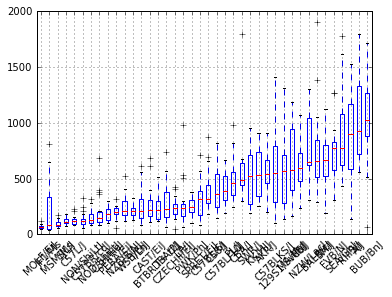

In [85]:
boxplot_sorted(df, by='strain', column='ASR_100', figsize=(12,14), rot=45)